In [3]:
%pylab inline
%config InlineBackend.figure_format = 'retina'
from ipywidgets import interact

Populating the interactive namespace from numpy and matplotlib


# 1D Velocity-jump process
Suppose the position of a random walker is given by $X(t)$. The random walker moves with a constant velocity, and the velocity switches randomly between $v = \pm r$. That is,
$$ \dot{X} = v(N(t)), \quad v(N) = Nr,$$
where $N(t)$ is a two state Markov process (like the traffic light) that takes values of either $\{-1, 1\}$.
The transitions between the two states are as follows
$$ (N=-1) {{\alpha \atop\longrightarrow}\atop{\longleftarrow\atop \beta}} (N=1). $$

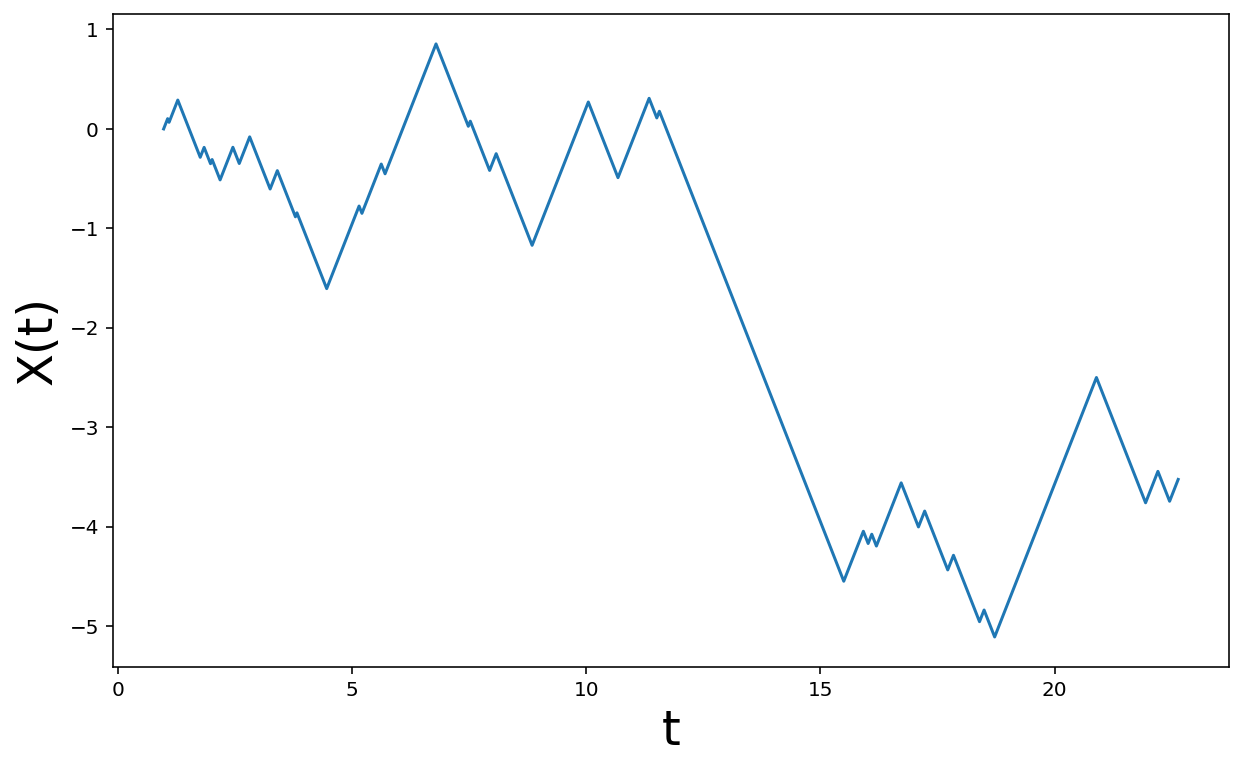

In [90]:
r = 1.2
alpha = 2.
beta = 2.
n0 = -1 ## must be -1 or 1
x0 = 0.
Nsteps = 50
T = zeros(Nsteps)
T[0] = 0
N = zeros(Nsteps)
N[0] = n0
X = zeros(Nsteps)
X[0] = x0
for j in arange(Nsteps): ## compute the rate using if statement
    n = N[j-1]
    u = rand(1)[0]
    if n == 1: 
        rate = beta
    else:
        rate = alpha
    tau = -log(u)/rate
    T[j] = T[j-1] + tau ## t += tau is the same as t = t + tau
    X[j] = X[j-1] + tau*(n*r) ## X(t + tau) = X(t) + tau*v(N)
    N[j] = -1 if n==1 else 1 ## you can put an if statement in one line like this
    

fig = figure(1, [10, 6])
plot(T, X)
xlabel('t', fontsize=24)
ylabel('X(t)', fontsize=24);